In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 


# Feature Engineering

In [2]:
df = pd.read_csv('clean_df_final_with_new_features.csv', index_col=0)

In [75]:
df.isnull().sum()

TARGET                                                      0
NAME_CONTRACT_TYPE                                          0
CODE_GENDER                                                 0
FLAG_OWN_CAR                                                0
FLAG_OWN_REALTY                                             0
AMT_INCOME_TOTAL                                            0
AMT_ANNUITY                                                 0
AMT_GOODS_PRICE                                             0
NAME_TYPE_SUITE                                             0
NAME_INCOME_TYPE                                            0
NAME_EDUCATION_TYPE                                         0
NAME_FAMILY_STATUS                                          0
NAME_HOUSING_TYPE                                           0
REGION_POPULATION_RELATIVE                                  0
DAYS_BIRTH                                                  0
DAYS_REGISTRATION                                           0
DAYS_ID_

In [48]:
df.shape

(306369, 189)

In [3]:
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
SK_ID_CURR                                                        
100002           1         Cash loans           M             0   
100003           0         Cash loans           F             0   
100004           0    Revolving loans           M             1   
100006           0         Cash loans           F             0   
100007           0         Cash loans           M             0   

            FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                                    
100002                    1         12.218495    10.114579        12.768542   
100003                    0         12.506177    10.482864        13.937286   
100004                    1         11.119883     8.817298        11.813030   
100006                    1         11.813030    10.298448        12.601487   
100007                    1         11.707670     9.992665        13.148031   

           NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
SK_ID_CURR                                                                   
100002       Unaccompanied          Working  Secondary / secondary special   
100003              Family    State servant               Higher education   
100004       Unaccompanied          Working  Secondary / secondary special   
100006       Unaccompanied          Working  Secondary / secondary special   
100007       Unaccompanied          Working  Secondary / secondary special   

              NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
SK_ID_CURR                                            
100002      Single / not married  House / apartment   
100003                   Married  House / apartment   
100004      Single / not married  House / apartment   
100006            Civil marriage  House / apartment   
100007      Single / not married  House / apartment   

            REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_REGISTRATION  \
SK_ID_CURR                                                              
100002                       -3.973845       -9461            -3648.0   
100003                       -5.643346      -16765            -1186.0   
100004                       -4.601975      -19046            -4260.0   
100006                       -4.825942      -19005            -9833.0   
100007                       -3.552148      -19932            -4311.0   

            DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
SK_ID_CURR                                                                 
100002                -2120           1               1                0   
100003                 -291           1               1                0   
100004                -2531           1               1                1   
100006                -2437           1               1                0   
100007                -3458           1               1                0   

            FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
SK_ID_CURR                                                             
100002                     1           1           0        Laborers   
100003                     1           1           0      Core staff   
100004                     1           1           0        Laborers   
100006                     1           0           0        Laborers   
100007                     1           0           0      Core staff   

           CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                                                                      
100002                 1.0                     2                            2   
100003                 2.0                     1                            1   
100004                 1.0                     2                            2   
100006                 2.0                     2                            2   
100007             

In [4]:
df['FLAG_OWN_CAR'].dtype

dtype('int64')

In [6]:
print(df.dtypes)

TARGET                                                        int64
NAME_CONTRACT_TYPE                                           object
CODE_GENDER                                                  object
FLAG_OWN_CAR                                                  int64
FLAG_OWN_REALTY                                               int64
AMT_INCOME_TOTAL                                            float64
AMT_ANNUITY                                                 float64
AMT_GOODS_PRICE                                             float64
NAME_TYPE_SUITE                                              object
NAME_INCOME_TYPE                                             object
NAME_EDUCATION_TYPE                                          object
NAME_FAMILY_STATUS                                           object
NAME_HOUSING_TYPE                                            object
REGION_POPULATION_RELATIVE                                  float64
DAYS_BIRTH                                      

In [5]:
cat_cols = []
num_cols = []

for col in df.columns:
    if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
        df[col] = df[col].astype('category')
        cat_cols.append(col)
    else:
        num_cols.append(col)

print(f'string or categorical columns:\n {cat_cols}')
print('--------------------------------------------------------------------------------------------------------------------')
print(f'numeric columns:\n {num_cols}')

string or categorical columns:
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'ELEVATORS_MODE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'count_CREDIT_ACTIVE_Bad_debt', 'count_CREDIT_CURRENCY_currency3', 'count_CREDIT_CURRENCY_currency4', 'count_CREDIT_TYPE_Creditc_card', 'count_CREDIT_TYPE_Loan_for_working_capital_replenishment', 'count_CREDIT_TYPE_Loan_for_business_development', 'count_CREDIT_TYPE_Real_estate_loan', 'count_CREDIT_TYPE_Unknown_type_of_loan', 'count_CREDIT_TYPE_Another_type_of_loan', 'count_CREDIT_TYPE_Cash_loan', 'count_CREDIT_TYPE_purchase_of_equipment', 'count_CREDIT_TYPE_Mobile_operator_loan', 'count_CREDIT_TYPE_Interbank_cre

In [8]:
print(df.dtypes)

TARGET                                                         int64
NAME_CONTRACT_TYPE                                          category
CODE_GENDER                                                 category
FLAG_OWN_CAR                                                   int64
FLAG_OWN_REALTY                                                int64
AMT_INCOME_TOTAL                                             float64
AMT_ANNUITY                                                  float64
AMT_GOODS_PRICE                                              float64
NAME_TYPE_SUITE                                             category
NAME_INCOME_TYPE                                            category
NAME_EDUCATION_TYPE                                         category
NAME_FAMILY_STATUS                                          category
NAME_HOUSING_TYPE                                           category
REGION_POPULATION_RELATIVE                                   float64
DAYS_BIRTH                        

In [6]:
print(sum(df.dtypes == 'category'))

142


The new features provide additional insights and dimensions to our data, enabling us to potentially uncover correlations and patterns that could be valuable for predictive modeling . They capture aspects like applicant age, affordability, documentation, and contact methods, which can be critical in assessing loan applications.

ANNUITY_INCOME_RATIO: This feature represents the ratio of the applicant's annual loan annuity (AMT_ANNUITY) to their total annual income (AMT_INCOME_TOTAL). It gives insight into how much of their income will be allocated to repaying the loan.

AGE_AT_APPLICATION: This feature calculates the age of the applicant at the time of loan application. It's derived from the number of days since birth (DAYS_BIRTH) and is divided by -365 to convert it into years.

CREDIT_TO_INCOME_RATIO: Similar to the ANNUITY_INCOME_RATIO, this feature calculates the ratio of the loan annuity (AMT_ANNUITY) to the applicant's total annual income (AMT_INCOME_TOTAL). It provides an alternative perspective on the affordability of the loan.

LENGTH_OF_RESIDENCE: This feature computes the length of residence by subtracting the number of days since registration (DAYS_REGISTRATION) from the number of days since ID was published (DAYS_ID_PUBLISH). The result is divided by -365 to express it in years.

DOCUMENT_COUNT: It counts the number of document flags (e.g., FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, etc.) that are marked as "1" for each applicant. This feature represents how many documents an applicant has provided or submitted.

CONTACT_METHOD_COUNT: This feature counts the number of contact method flags (e.g., FLAG_MOBIL, FLAG_EMP_PHONE, etc.) that are marked as "1" for each applicant. It indicates how many different contact methods an applicant has, such as a mobile phone, work phone, or email.

FLAG_ANY_DOCUMENT_MISSING: This binary feature is set to 1 if an applicant has not submitted any documents (i.e., the DOCUMENT_COUNT is 0), and 0 otherwise. It helps identify applicants who may not have provided any required documents.

In [9]:
df['ANNUITY_INCOME_RATIO'].isnull().sum()

# Annuity to Income Ratio
df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

# Age at Application
df['AGE_AT_APPLICATION'] = df['DAYS_BIRTH'] / -365

# # Employment Length
# df['EMPLOYMENT_LENGTH'] = (df['DAYS_BIRTH'] - df['DAYS_ID_PUBLISH']) / -365

# Credit to Income Ratio
df['CREDIT_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

# Length of Residence
df['LENGTH_OF_RESIDENCE'] = (df['DAYS_ID_PUBLISH'] - df['DAYS_REGISTRATION']) / -365

# Document Count
document_flags = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                  'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                  'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                  'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                  'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df['DOCUMENT_COUNT'] = df[document_flags].sum(axis=1)

# Contact Information Count
contact_flags = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

df['CONTACT_METHOD_COUNT'] = df[contact_flags].sum(axis=1)

# # Missing Value Count
# df['MISSING_VALUE_COUNT'] = df.isnull().sum(axis=1)

# Average External Source
#external_sources = ['EXT_SOURCE_2', 'EXT_SOURCE_3_iqr']  # Add more sources if available

#df['AVG_EXTERNAL_SOURCE'] = df[external_sources].mean(axis=1)

# Flag Any Document Missing
df['FLAG_ANY_DOCUMENT_MISSING'] = df[document_flags].sum(axis=1).apply(lambda x: 1 if x == 0 else 0)



## New features based on multivariate analysis:

In [10]:
df['exp_AMT_INCOME_TOTAL'] = np.exp(df['AMT_INCOME_TOTAL'])

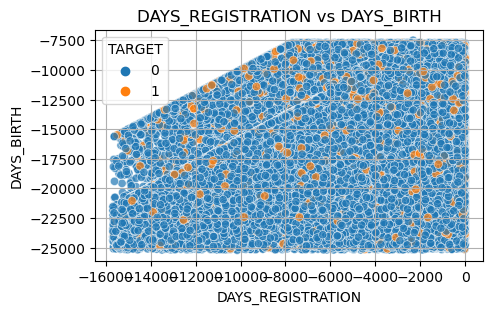

In [12]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='DAYS_REGISTRATION', y='DAYS_BIRTH', color='blue', alpha=0.7, hue='TARGET')

plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('DAYS_BIRTH')
plt.title('DAYS_REGISTRATION vs DAYS_BIRTH')
plt.grid(True)

In [64]:
df['DAYS_REGISTRATION_groupes'] = np.where(df['DAYS_REGISTRATION'] < -800 , 0, 1)

## Impact Coding

Impact coding is a method to turn categorical variables into numerical values based on their relationship with the other variable, helping machine learning models better capture these relationships for improved predictions.

In [15]:
print(df['ORGANIZATION_TYPE'].value_counts())

Business Entity Type 3    67733
XNA                       55122
Self-employed             38307
Other                     16636
Medicine                  11166
Business Entity Type 2    10527
Government                10379
School                     8876
Trade: type 7              7793
Kindergarten               6873
Construction               6709
Business Entity Type 1     5953
Transport: type 4          5379
Trade: type 3              3404
Industry: type 9           3363
Industry: type 3           3263
Security                   3239
Housing                    2952
Industry: type 11          2696
Military                   2626
Bank                       2498
Agriculture                2441
Police                     2335
Transport: type 2          2195
Postal                     2150
Security Ministries        1972
Trade: type 2              1860
Restaurant                 1806
Services                   1570
University                 1324
Industry: type 7           1304
Transpor

In [19]:
# Calculate the mean of the target variable for each unique 'ORGANIZATION_TYPE' category
org_type_means = df.groupby('ORGANIZATION_TYPE')['AMT_INCOME_TOTAL'].mean()

# Create a dictionary to map the mean values to each 'ORGANIZATION_TYPE' category
org_type_impact_coding = org_type_means.to_dict()

# Apply impact coding to the 'ORGANIZATION_TYPE' feature
df['ORGANIZATION_TYPE_Impact'] = df['ORGANIZATION_TYPE'].map(org_type_impact_coding)


In [20]:
df['ORGANIZATION_TYPE_Impact'].isna().sum()

0

In [23]:
df['ORGANIZATION_TYPE_Impact'] = df['ORGANIZATION_TYPE_Impact'].astype(float)

In [24]:
print(df['ORGANIZATION_TYPE_Impact'].value_counts())

12.022824    67757
11.695960    55194
11.919502    38320
11.944909    16644
11.850997    11169
11.941103    10529
11.869689    10382
11.838281     8878
11.912604     7797
11.726120     6874
12.105529     6709
12.007676     5955
12.051605     5381
11.891947     3408
12.099151     3364
11.813990     3265
11.921111     3241
11.870938     2953
11.901843     2697
12.205851     2628
12.060018     2499
11.755659     2442
12.156623     2335
11.992091     2196
11.678224     2151
12.107222     1973
12.041867     1861
11.859187     1808
12.030827     1570
12.012668     1324
11.916444     1305
11.996470     1185
11.962204     1036
11.855750      963
11.954049      949
11.985724      875
11.995228      628
11.996186      599
12.048541      591
11.975674      575
12.031947      559
11.938553      458
12.075104      428
12.204689      396
11.949017      379
12.028228      367
11.907880      347
11.949372      315
12.292989      304
11.854490      259
12.059315      200
11.930147      112
12.115688   

In [25]:
print(df['OCCUPATION_TYPE'].value_counts())

Missing                  96072
Laborers                 55040
Sales staff              31976
Core staff               27462
Managers                 21295
Drivers                  18559
High skill tech staff    11336
Accountants               9771
Medicine staff            8520
Security staff            6708
Cooking staff             5935
Cleaning staff            4651
Private service staff     2645
Low-skill Laborers        2079
Waiters/barmen staff      1345
Secretaries               1301
Realty agents              751
HR staff                   562
IT staff                   523
Name: OCCUPATION_TYPE, dtype: int64


In [27]:

df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].astype('object')

# Calculate the mean of the target variable for each unique 'ORGANIZATION_TYPE' category
occ_type_means = df.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean()

# Create a dictionary to map the mean values to each 'ORGANIZATION_TYPE' category
occ_type_impact_coding = occ_type_means.to_dict()

# Apply impact coding to the 'ORGANIZATION_TYPE' feature
df['OCCUPATION_TYPE_Impact'] = df['OCCUPATION_TYPE'].map(occ_type_impact_coding)

# If there are any missing values after mapping, fill them with the overall mean of the target variable
df['OCCUPATION_TYPE_Impact'].fillna(df['AMT_INCOME_TOTAL'].mean(), inplace=True)



In [28]:
df['OCCUPATION_TYPE_Impact'] = df['OCCUPATION_TYPE_Impact'].astype(float)

In [29]:
print(df['OCCUPATION_TYPE_Impact'].value_counts())

11.807773    96072
11.919571    55040
11.833245    31976
11.942460    27462
12.325039    21295
12.057734    18559
12.007131    11336
12.063691     9771
11.813128     8520
11.819990     6708
11.743616     5935
11.678938     4651
12.011570     2645
11.723813     2079
11.785118     1345
11.857339     1301
12.099002      751
12.047872      562
12.134185      523
Name: OCCUPATION_TYPE_Impact, dtype: int64


In [30]:

variables_to_remove= ['ORGANIZATION_TYPE','OCCUPATION_TYPE']
cat_cols = [var for var in cat_cols if var not in variables_to_remove]

df = df.drop(columns=variables_to_remove)


new_numeric_variables = ['ORGANIZATION_TYPE_Impact','OCCUPATION_TYPE_Impact']
num_cols.extend(new_numeric_variables)

In [31]:
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
SK_ID_CURR                                                        
100002           1         Cash loans           M             0   
100003           0         Cash loans           F             0   
100004           0    Revolving loans           M             1   
100006           0         Cash loans           F             0   
100007           0         Cash loans           M             0   

            FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                                    
100002                    1         12.218495    10.114579        12.768542   
100003                    0         12.506177    10.482864        13.937286   
100004                    1         11.119883     8.817298        11.813030   
100006                    1         11.813030    10.298448        12.601487   
100007                    1         11.707670     9.992665        13.148031   

           NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
SK_ID_CURR                                                                   
100002       Unaccompanied          Working  Secondary / secondary special   
100003              Family    State servant               Higher education   
100004       Unaccompanied          Working  Secondary / secondary special   
100006       Unaccompanied          Working  Secondary / secondary special   
100007       Unaccompanied          Working  Secondary / secondary special   

              NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
SK_ID_CURR                                            
100002      Single / not married  House / apartment   
100003                   Married  House / apartment   
100004      Single / not married  House / apartment   
100006            Civil marriage  House / apartment   
100007      Single / not married  House / apartment   

            REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_REGISTRATION  \
SK_ID_CURR                                                              
100002                       -3.973845       -9461            -3648.0   
100003                       -5.643346      -16765            -1186.0   
100004                       -4.601975      -19046            -4260.0   
100006                       -4.825942      -19005            -9833.0   
100007                       -3.552148      -19932            -4311.0   

            DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
SK_ID_CURR                                                                 
100002                -2120           1               1                0   
100003                 -291           1               1                0   
100004                -2531           1               1                1   
100006                -2437           1               1                0   
100007                -3458           1               1                0   

            FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL CNT_FAM_MEMBERS  \
SK_ID_CURR                                                             
100002                     1           1           0             1.0   
100003                     1           1           0             2.0   
100004                     1           1           0             1.0   
100006                     1           0           0             2.0   
100007                     1           0           0             1.0   

            REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                                                      
100002                         2                            2   
100003                         1                            1   
100004                         2                            2   
100006                         2                            2   
100007                         2                            2   

           WEEKDAY_APPR_PROCESS_START  HOUR_APPR_

In [32]:
df.shape

(306531, 210)

Dummies are used to ensure that categorical data can be used in numerical computations and avoid misleading the model into interpreting categories as having an ordinal relationship.

In [33]:
dummies_columns = df.select_dtypes(include=['category']).columns

print("Columns with string content:", dummies_columns)

Columns with string content: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'ELEVATORS_MODE',
       ...
       'LIVINGAREA_MEDI_iqr', 'max_DAYS_ENDDATE_FACT_iqr',
       'max_AMT_CREDIT_MAX_OVERDUE_iqr', 'LIVINGAREA_MODE_iqr',
       'NONLIVINGAPARTMENTS_AVG_iqr', 'OWN_CAR_AGE_iqr', 'APARTMENTS_AVG_iqr',
       'APARTMENTS_MODE_iqr', 'ANNUITY_INCOME_RATIO_iqr',
       'count_NAME_PAYMENT_TYPE_XNA_iqr'],
      dtype='object', length=140)


In [34]:
for col in df.columns:
    if df[col].dtype == 'category':
        print(f'{len(df[col].value_counts())},{col}')

2,NAME_CONTRACT_TYPE
3,CODE_GENDER
8,NAME_TYPE_SUITE
8,NAME_INCOME_TYPE
5,NAME_EDUCATION_TYPE
6,NAME_FAMILY_STATUS
6,NAME_HOUSING_TYPE
5,CNT_FAM_MEMBERS
7,WEEKDAY_APPR_PROCESS_START
9,ELEVATORS_MODE
5,FONDKAPREMONT_MODE
4,HOUSETYPE_MODE
8,WALLSMATERIAL_MODE
3,EMERGENCYSTATE_MODE
7,OBS_30_CNT_SOCIAL_CIRCLE
7,OBS_60_CNT_SOCIAL_CIRCLE
6,AMT_REQ_CREDIT_BUREAU_HOUR
9,AMT_REQ_CREDIT_BUREAU_YEAR
3,count_CREDIT_ACTIVE_Bad_debt
5,count_CREDIT_CURRENCY_currency3
3,count_CREDIT_CURRENCY_currency4
7,count_CREDIT_TYPE_Creditc_card
6,count_CREDIT_TYPE_Loan_for_working_capital_replenishment
9,count_CREDIT_TYPE_Loan_for_business_development
3,count_CREDIT_TYPE_Real_estate_loan
6,count_CREDIT_TYPE_Unknown_type_of_loan
6,count_CREDIT_TYPE_Another_type_of_loan
4,count_CREDIT_TYPE_Cash_loan
4,count_CREDIT_TYPE_purchase_of_equipment
3,count_CREDIT_TYPE_Mobile_operator_loan
3,count_CREDIT_TYPE_Interbank_credit
3,count_CREDIT_TYPE_purchase_of_shares
8,count_NAME_CONTRACT_TYPE_Consumer_loans
9,count_NAME_CASH

In [66]:

# Create dummy variables for the features (excluding the 'TARGET' column)
df_dummies = df
df_dummies = pd.get_dummies(df_dummies, columns=dummies_columns)


In [61]:
df_dummies.columns

Index(['TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'APARTMENTS_MODE_iqr_Q2', 'APARTMENTS_MODE_iqr_Q3',
       'APARTMENTS_MODE_iqr_missing', 'ANNUITY_INCOME_RATIO_iqr_Q1',
       'ANNUITY_INCOME_RATIO_iqr_Q2', 'ANNUITY_INCOME_RATIO_iqr_Q3',
       'ANNUITY_INCOME_RATIO_iqr_missing',
       'count_NAME_PAYMENT_TYPE_XNA_iqr_Q2',
       'count_NAME_PAYMENT_TYPE_XNA_iqr_Q3',
       'count_NAME_PAYMENT_TYPE_XNA_iqr_missing'],
      dtype='object', length=675)

In [76]:
df_dummies.isna().sum()

TARGET                                                                   0
FLAG_OWN_CAR                                                             0
FLAG_OWN_REALTY                                                          0
AMT_INCOME_TOTAL                                                         0
AMT_ANNUITY                                                              0
AMT_GOODS_PRICE                                                          0
REGION_POPULATION_RELATIVE                                               0
DAYS_BIRTH                                                               0
DAYS_REGISTRATION                                                        0
DAYS_ID_PUBLISH                                                          0
FLAG_MOBIL                                                               0
FLAG_EMP_PHONE                                                           0
FLAG_WORK_PHONE                                                          0
FLAG_CONT_MOBILE         

In [67]:
df_dummies.shape

(306531, 675)

In [79]:
df_dummies = df_dummies.drop(columns='max_CNT_CREDIT_PROLONG',axis=1)

In [81]:
df_dummies.isna().sum()

TARGET                                                              0
FLAG_OWN_CAR                                                        0
FLAG_OWN_REALTY                                                     0
AMT_INCOME_TOTAL                                                    0
AMT_ANNUITY                                                         0
AMT_GOODS_PRICE                                                     0
REGION_POPULATION_RELATIVE                                          0
DAYS_BIRTH                                                          0
DAYS_REGISTRATION                                                   0
DAYS_ID_PUBLISH                                                     0
FLAG_MOBIL                                                          0
FLAG_EMP_PHONE                                                      0
FLAG_WORK_PHONE                                                     0
FLAG_CONT_MOBILE                                                    0
FLAG_PHONE          

In [68]:
df_dummies.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
SK_ID_CURR                                                            
100002           1             0                1         12.218495   
100003           0             0                0         12.506177   
100004           0             1                1         11.119883   
100006           0             0                1         11.813030   
100007           0             0                1         11.707670   

            AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                                                             
100002        10.114579        12.768542                   -3.973845   
100003        10.482864        13.937286                   -5.643346   
100004         8.817298        11.813030                   -4.601975   
100006        10.298448        12.601487                   -4.825942   
100007         9.992665        13.148031                   -3.552148   

            DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
SK_ID_CURR                                                               
100002           -9461            -3648.0            -2120           1   
100003          -16765            -1186.0             -291           1   
100004          -19046            -4260.0            -2531           1   
100006          -19005            -9833.0            -2437           1   
100007          -19932            -4311.0            -3458           1   

            FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
SK_ID_CURR                                                                  
100002                   1                0                 1           1   
100003                   1                0                 1           1   
100004                   1                1                 1           1   
100006                   1                0                 1           0   
100007                   1                0                 1           0   

            FLAG_EMAIL  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                                                                  
100002               0                     2                            2   
100003               0                     1                            1   
100004               0                     2                            2   
100006               0                     2                            2   
100007               0                     2                            2   

            HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                                                        
100002                         10.0                           0   
100003                         11.0                           0   
100004                          9.0                           0   
100006                         17.0                           0   
100007                         11.0                           0   

            REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                                                            
100002                               0                            0   
100003                               0                            0   
100004                               0                            0   
100006                               0                            0   
100007                               0                            0   

            REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                   
100002                           0                       0   
100003                           0                       0   
100004                           0                       0   
100006                           0                       0   
100007                           0                       1   

       

In [38]:
print(df_dummies['TARGET'].value_counts())

0    281804
1     24727
Name: TARGET, dtype: int64


Min Max Scale is particularly useful when features have different ranges, and it helps models converge faster during training, especially for algorithms sensitive to feature scales, like neural networks and support vector machines.

In [82]:
numeric_columns = df_dummies.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    
    min_value = df_dummies[column].min()
    max_value = df_dummies[column].max()
    df_dummies[column] = (df_dummies[column] - min_value) / (max_value - min_value)

In [40]:
df_dummies.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
SK_ID_CURR                                                            
100002         1.0           0.0              1.0          0.245235   
100003         0.0           0.0              0.0          0.279379   
100004         0.0           1.0              1.0          0.114842   
100006         0.0           0.0              1.0          0.197110   
100007         0.0           0.0              1.0          0.184605   

            AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                                                             
100002         0.537543         0.468926                    0.755543   
100003         0.610134         0.722716                    0.453183   
100004         0.281841         0.261439                    0.641784   
100006         0.573785         0.432651                    0.601222   
100007         0.513513         0.551331                    0.831916   

            DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
SK_ID_CURR                                                               
100002        0.888839           0.767347         0.705433         1.0   
100003        0.477114           0.924362         0.959566         1.0   
100004        0.348534           0.728316         0.648326         1.0   
100006        0.350846           0.372895         0.661387         1.0   
100007        0.298591           0.725064         0.519522         1.0   

            FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
SK_ID_CURR                                                                  
100002                 1.0              0.0               1.0         1.0   
100003                 1.0              0.0               1.0         1.0   
100004                 1.0              1.0               1.0         1.0   
100006                 1.0              0.0               1.0         0.0   
100007                 1.0              0.0               1.0         0.0   

            FLAG_EMAIL  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                                                                  
100002             0.0                   0.5                          0.5   
100003             0.0                   0.0                          0.0   
100004             0.0                   0.5                          0.5   
100006             0.0                   0.5                          0.5   
100007             0.0                   0.5                          0.5   

            HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                                                        
100002                       0.3750                         0.0   
100003                       0.4375                         0.0   
100004                       0.3125                         0.0   
100006                       0.8125                         0.0   
100007                       0.4375                         0.0   

            REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                                                            
100002                             0.0                          0.0   
100003                             0.0                          0.0   
100004                             0.0                          0.0   
100006                             0.0                          0.0   
100007                             0.0                          0.0   

            REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                   
100002                         0.0                     0.0   
100003                         0.0                     0.0   
100004                         0.0                     0.0   
100006                         0.0                     0.0   
100007                         0.0                     1.0   

       

In [3]:
df_dummies['max_CNT_CREDIT_PROLONG'] =0

# Feature selections

Feature selection using univariate and multivariate analysis is a process of choosing the most relevant features for a machine learning model.

Univariate Analysis: In univariate analysis, features are evaluated individually based on statistical tests like chi-squared, ANOVA, or correlation coefficients. Features with the highest test scores, indicating a strong relationship with the target variable, are selected.

Multivariate Analysis: Multivariate analysis considers interactions between features. Techniques like recursive feature elimination (RFE) or feature importance from ensemble models (e.g., random forests) are used to assess the collective importance of features. Less important features are removed iteratively.

By summing up the feature importance scores from both univariate and multivariate analyses, we can identify the features that are consistently ranked as important across different methods. 

In [42]:
from importlib import reload
from pyMechkar.analysis import Table1
# reload(tb1)

In [43]:
df_dummies.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
SK_ID_CURR                                                            
100002         1.0           0.0              1.0          0.245235   
100003         0.0           0.0              0.0          0.279379   
100004         0.0           1.0              1.0          0.114842   
100006         0.0           0.0              1.0          0.197110   
100007         0.0           0.0              1.0          0.184605   

            AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                                                             
100002         0.537543         0.468926                    0.755543   
100003         0.610134         0.722716                    0.453183   
100004         0.281841         0.261439                    0.641784   
100006         0.573785         0.432651                    0.601222   
100007         0.513513         0.551331                    0.831916   

            DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
SK_ID_CURR                                                               
100002        0.888839           0.767347         0.705433         1.0   
100003        0.477114           0.924362         0.959566         1.0   
100004        0.348534           0.728316         0.648326         1.0   
100006        0.350846           0.372895         0.661387         1.0   
100007        0.298591           0.725064         0.519522         1.0   

            FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
SK_ID_CURR                                                                  
100002                 1.0              0.0               1.0         1.0   
100003                 1.0              0.0               1.0         1.0   
100004                 1.0              1.0               1.0         1.0   
100006                 1.0              0.0               1.0         0.0   
100007                 1.0              0.0               1.0         0.0   

            FLAG_EMAIL  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                                                                  
100002             0.0                   0.5                          0.5   
100003             0.0                   0.0                          0.0   
100004             0.0                   0.5                          0.5   
100006             0.0                   0.5                          0.5   
100007             0.0                   0.5                          0.5   

            HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                                                        
100002                       0.3750                         0.0   
100003                       0.4375                         0.0   
100004                       0.3125                         0.0   
100006                       0.8125                         0.0   
100007                       0.4375                         0.0   

            REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                                                            
100002                             0.0                          0.0   
100003                             0.0                          0.0   
100004                             0.0                          0.0   
100006                             0.0                          0.0   
100007                             0.0                          0.0   

            REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                   
100002                         0.0                     0.0   
100003                         0.0                     0.0   
100004                         0.0                     0.0   
100006                         0.0                     0.0   
100007                         0.0                     1.0   

       

In [44]:
df_dummies.shape

(306531, 675)

# Univariable Analysis

In [45]:
tab1 = Table1(data=df_dummies, y="TARGET")

Begining analysis...
Factorizing... please wait
[**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
[]
*********************************************************************************************************************************************************************************************************************************************************************************

C:\Users\netta\anaconda3\lib\site-packages\pyMechkar\analysis.py:272: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bb = pd.Series({x : y.tolist() for x,y in data[v].groupby(data[y])})
C:\Users\netta\anaconda3\lib\site-packages\pyMechkar\analysis.py:280: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bb = pd.Series({x : y.tolist() for x,y in prevar[v].groupby(prevar[y])})
C:\Users\netta\anaconda3\lib\site-packages\pyMechkar\analysis.py:272: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bb = pd.Series({x : y.tolist() for x,y in data[v].groupby(data[y])})
C:\Users\netta\anaconda3\lib\site-packages\pyMechkar\analysis.py:280: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bb = pd.Series({x : y.tolist() for x,y in prevar[

C:\Users\netta\anaconda3\lib\site-packages\pyMechkar\analysis.py:280: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bb = pd.Series({x : y.tolist() for x,y in prevar[v].groupby(prevar[y])})
C:\Users\netta\anaconda3\lib\site-packages\pyMechkar\analysis.py:272: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bb = pd.Series({x : y.tolist() for x,y in data[v].groupby(data[y])})
C:\Users\netta\anaconda3\lib\site-packages\pyMechkar\analysis.py:280: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bb = pd.Series({x : y.tolist() for x,y in prevar[v].groupby(prevar[y])})
C:\Users\netta\anaconda3\lib\site-packages\pyMechkar\analysis.py:272: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bb = pd.Series({x : y.tolist() for x,y in dat

['Unable to calcualte the Fisher exact test for variables pca_credit_CAT and TARGET... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables DOCUMENT_COUNT and TARGET... The p-value may be incorrect']
------ Finished in 29107.552201747894econds -----


C:\Users\netta\anaconda3\lib\site-packages\pyMechkar\analysis.py:374: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tabaaa1 = tabaaa1.drop('n',1)
C:\Users\netta\anaconda3\lib\site-packages\pyMechkar\analysis.py:375: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tabaaa1 = tabaaa1.drop('Del',1)


In [46]:
tab1

Variables    Categories  \
0                                           Individuals             n   
1                                          FLAG_OWN_CAR           0.0   
2                                          FLAG_OWN_CAR           1.0   
3                                       FLAG_OWN_REALTY           1.0   
4                                       FLAG_OWN_REALTY           0.0   
5                                      AMT_INCOME_TOTAL     Mean (SD)   
6                                      AMT_INCOME_TOTAL  Median (IQR)   
8                                           AMT_ANNUITY     Mean (SD)   
9                                           AMT_ANNUITY  Median (IQR)   
11                                      AMT_GOODS_PRICE     Mean (SD)   
12                                      AMT_GOODS_PRICE  Median (IQR)   
14                           REGION_POPULATION_RELATIVE     Mean (SD)   
15                           REGION_POPULATION_RELATIVE  Median (IQR)   
17                                           DAYS_BIRTH     Mean (SD)   
18                                           DAYS_BIRTH  Median (IQR)   
20                                    DAYS_REGISTRATION     Mean (SD)   
21                                    DAYS_REGISTRATION  Median (IQR)   
23                                      DAYS_ID_PUBLISH     Mean (SD)   
24                                      DAYS_ID_PUBLISH  Median (IQR)   
26                                           FLAG_MOBIL           1.0   
27                                           FLAG_MOBIL           0.0   
28                                       FLAG_EMP_PHONE           1.0   
29                                       FLAG_EMP_PHONE           0.0   
30                                      FLAG_WORK_PHONE           0.0   
31                                      FLAG_WORK_PHONE           1.0   
32                                     FLAG_CONT_MOBILE           1.0   
33                                     FLAG_CONT_MOBILE           0.0   
34                                           FLAG_PHONE           0.0   
35                                           FLAG_PHONE           1.0   
36                                           FLAG_EMAIL           0.0   
37                                           FLAG_EMAIL           1.0   
38                                 REGION_RATING_CLIENT           0.5   
39                                 REGION_RATING_CLIENT           1.0   
40                                 REGION_RATING_CLIENT           0.0   
41                          REGION_RATING_CLIENT_W_CITY           0.5   
42                          REGION_RATING_CLIENT_W_CITY           1.0   
43                          REGION_RATING_CLIENT_W_CITY           0.0   
44                              HOUR_APPR_PROCESS_START     Mean (SD)   
45                              HOUR_APPR_PROCESS_START  Median (IQR)   
47                           REG_REGION_NOT_LIVE_REGION           0.0   
48                           REG_REGION_NOT_LIVE_REGION           1.0   
49                           REG_REGION_NOT_WORK_REGION           0.0   
50                           REG_REGION_NOT_WORK_REGION           1.0   
51                          LIVE_REGION_NOT_WORK_REGION           0.0   
52                          LIVE_REGION_NOT_WORK_REGION           1.0   
53                               REG_CITY_NOT_LIVE_CITY           0.0   
54                               REG_CITY_NOT_LIVE_CITY           1.0   
55                               REG_CITY_NOT_WORK_CITY           0.0   
56                               REG_CITY_NOT_WORK_CITY           1.0   
57                              LIVE_CITY_NOT_WORK_CITY           0.0   
58                              LIVE_CITY_NOT_WORK_CITY           1.0   
59                                         EXT_SOURCE_2     Mean (SD)   
60                                         EXT_SOURCE_2  Median (IQR)   
62                               DAYS_LAST_PHONE_CHANGE     Mean (SD)   
63                             

In [39]:
tab1[tab1['p_value']<0.05]

Variables Categories  \
2                                          FLAG_OWN_CAR        1.0   
4                                       FLAG_OWN_REALTY        0.0   
5                                      AMT_INCOME_TOTAL  Mean (SD)   
11                                      AMT_GOODS_PRICE  Mean (SD)   
14                           REGION_POPULATION_RELATIVE  Mean (SD)   
17                                           DAYS_BIRTH  Mean (SD)   
20                                    DAYS_REGISTRATION  Mean (SD)   
23                                      DAYS_ID_PUBLISH  Mean (SD)   
29                                       FLAG_EMP_PHONE        0.0   
31                                      FLAG_WORK_PHONE        1.0   
35                                           FLAG_PHONE        1.0   
39                                 REGION_RATING_CLIENT        1.0   
42                          REGION_RATING_CLIENT_W_CITY        1.0   
44                              HOUR_APPR_PROCESS_START  Mean (SD)   
48                           REG_REGION_NOT_LIVE_REGION        1.0   
50                           REG_REGION_NOT_WORK_REGION        1.0   
54                               REG_CITY_NOT_LIVE_CITY        1.0   
56                               REG_CITY_NOT_WORK_CITY        1.0   
58                              LIVE_CITY_NOT_WORK_CITY        1.0   
59                                         EXT_SOURCE_2  Mean (SD)   
62                               DAYS_LAST_PHONE_CHANGE  Mean (SD)   
68                                      FLAG_DOCUMENT_3        0.0   
74                                      FLAG_DOCUMENT_6        1.0   
78                                      FLAG_DOCUMENT_8        1.0   
80                                      FLAG_DOCUMENT_9        1.0   
84                                     FLAG_DOCUMENT_11        1.0   
88                                     FLAG_DOCUMENT_13        1.0   
90                                     FLAG_DOCUMENT_14        1.0   
92                                     FLAG_DOCUMENT_15        1.0   
94                                     FLAG_DOCUMENT_16        1.0   
98                                     FLAG_DOCUMENT_18        1.0   
107           avg_AMT_PAYMENT_CURRENT_missing_indicator        0.0   
109      avg_AMT_DRAWINGS_ATM_CURRENT_missing_indicator        0.0   
111      avg_AMT_DRAWINGS_POS_CURRENT_missing_indicator        0.0   
113             LIVINGAPARTMENTS_MEDI_missing_indicator        0.0   
114                                  AGE_AT_APPLICATION  Mean (SD)   
117                              CREDIT_TO_INCOME_RATIO  Mean (SD)   
120                                 LENGTH_OF_RESIDENCE  Mean (SD)   
124                                      DOCUMENT_COUNT        0.0   
134                                 AVG_EXTERNAL_SOURCE  Mean (SD)   
138                           FLAG_ANY_DOCUMENT_MISSING        1.0   
139                            ORGANIZATION_TYPE_Impact  Mean (SD)   
142                              OCCUPATION_TYPE_Impact  Mean (SD)   
146                       NAME_CONTRACT_TYPE_Cash loans          0   
148                  NAME_CONTRACT_TYPE_Revolving loans          1   
150                                       CODE_GENDER_F          0   
152                                       CODE_GENDER_M          1   
158                              NAME_TYPE_SUITE_Family          1   
162                             NAME_TYPE_SUITE_Missing          1   
166                             NAME_TYPE_SUITE_Other_B          1   
170                       NAME_TYPE_SUITE_Unaccompanied          0   
174               NAME_INCOME_TYPE_Commercial associate          1   
178                          NAME_INCOME_TYPE_Pensioner          1   
180                      NAME_INCOME_TYPE_State servant          1   
184                         NAME_INCOME_TYPE_Unemployed          1   
186                            NAME_INCOME_TYPE_Working          0   
190                NAME_EDUCATION_TYPE_Higher education 

In [50]:
vn1 = tab1.loc[tab1['p_value']<0.05,'Variables'].unique()
print(len(vn1))
vn1

541


array(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'Risk_Evaluation',
       'INCOME_CREDIT_DIFF', 'DAYS_EMPLOYED_DIFF', 'AVERAGE_EXT_SOURCE',
       'pca_residence_CAT', 'pca_credit_CAT', 'pca_ext_source_CAT',
       'avg_AMT_PAYMENT_CURRENT_missing_indicator',
       'avg_AMT_DRAWINGS_ATM_CURRENT

In [51]:
varSel = pd.DataFrame({'Variable': df_dummies.columns[1:]})

In [52]:
varSel

Variable
0                                         FLAG_OWN_CAR
1                                      FLAG_OWN_REALTY
2                                     AMT_INCOME_TOTAL
3                                          AMT_ANNUITY
4                                      AMT_GOODS_PRICE
5                           REGION_POPULATION_RELATIVE
6                                           DAYS_BIRTH
7                                    DAYS_REGISTRATION
8                                      DAYS_ID_PUBLISH
9                                           FLAG_MOBIL
10                                      FLAG_EMP_PHONE
11                                     FLAG_WORK_PHONE
12                                    FLAG_CONT_MOBILE
13                                          FLAG_PHONE
14                                          FLAG_EMAIL
15                                REGION_RATING_CLIENT
16                         REGION_RATING_CLIENT_W_CITY
17                             HOUR_APPR_PROCESS_START
18                          REG_REGION_NOT_LIVE_REGION
19                          REG_REGION_NOT_WORK_REGION
20                         LIVE_REGION_NOT_WORK_REGION
21                              REG_CITY_NOT_LIVE_CITY
22                              REG_CITY_NOT_WORK_CITY
23                             LIVE_CITY_NOT_WORK_CITY
24                                        EXT_SOURCE_2
25                              DAYS_LAST_PHONE_CHANGE
26                                     FLAG_DOCUMENT_2
27                                     FLAG_DOCUMENT_3
28                                     FLAG_DOCUMENT_4
29                                     FLAG_DOCUMENT_5
30                                     FLAG_DOCUMENT_6
31                                     FLAG_DOCUMENT_7
32                                     FLAG_DOCUMENT_8
33                                     FLAG_DOCUMENT_9
34                                    FLAG_DOCUMENT_10
35                                    FLAG_DOCUMENT_11
36                                    FLAG_DOCUMENT_12
37                                    FLAG_DOCUMENT_13
38                                    FLAG_DOCUMENT_14
39                                    FLAG_DOCUMENT_15
40                                    FLAG_DOCUMENT_16
41                                    FLAG_DOCUMENT_17
42                                    FLAG_DOCUMENT_18
43                                    FLAG_DOCUMENT_19
44                                    FLAG_DOCUMENT_20
45                                    FLAG_DOCUMENT_21
46                              max_CNT_CREDIT_PROLONG
47                                     Risk_Evaluation
48                                  INCOME_CREDIT_DIFF
49                                  DAYS_EMPLOYED_DIFF
50                                  AVERAGE_EXT_SOURCE
51                                   pca_residence_CAT
52                                      pca_credit_CAT
53                                  pca_ext_source_CAT
54           avg_AMT_PAYMENT_CURRENT_missing_indicator
55      avg_AMT_DRAWINGS_ATM_CURRENT_missing_indicator
56      avg_AMT_DRAWINGS_POS_CURRENT_missing_indicator
57             LIVINGAPARTMENTS_MEDI_missing_indicator
58                                ANNUITY_INCOME_RATIO
59                                  AGE_AT_APPLICATION
60                              CREDIT_TO_INCOME_RATIO
61                                 LENGTH_OF_RESIDENCE
62                                      DOCUMENT_COUNT
63                                CONTACT_METHOD_COUNT
64                           FLAG_ANY_DOCUMENT_MISSING
65                                exp_AMT_INCOME_TOTAL
66                           DAYS_REGISTRATION_groupes
67                            ORGANIZATION_TYPE_Impact
68                              OCCUPATION_TYPE_Impact
69                       NAME_CONTRACT_TYPE_Cash loans
70                  NAME_CONTRACT_TYPE_Revolving loans
71                                       CODE_GENDER_F
72                             

In [53]:
varSel['Univarable'] = 0
varSel.loc[varSel['Variable'].isin(vn1), 'Univarable'] = 1
varSel

Variable  Univarable
0                                         FLAG_OWN_CAR           1
1                                      FLAG_OWN_REALTY           1
2                                     AMT_INCOME_TOTAL           1
3                                          AMT_ANNUITY           0
4                                      AMT_GOODS_PRICE           1
5                           REGION_POPULATION_RELATIVE           1
6                                           DAYS_BIRTH           1
7                                    DAYS_REGISTRATION           1
8                                      DAYS_ID_PUBLISH           1
9                                           FLAG_MOBIL           0
10                                      FLAG_EMP_PHONE           1
11                                     FLAG_WORK_PHONE           1
12                                    FLAG_CONT_MOBILE           0
13                                          FLAG_PHONE           1
14                                          FLAG_EMAIL           0
15                                REGION_RATING_CLIENT           1
16                         REGION_RATING_CLIENT_W_CITY           1
17                             HOUR_APPR_PROCESS_START           1
18                          REG_REGION_NOT_LIVE_REGION           1
19                          REG_REGION_NOT_WORK_REGION           1
20                         LIVE_REGION_NOT_WORK_REGION           0
21                              REG_CITY_NOT_LIVE_CITY           1
22                              REG_CITY_NOT_WORK_CITY           1
23                             LIVE_CITY_NOT_WORK_CITY           1
24                                        EXT_SOURCE_2           1
25                              DAYS_LAST_PHONE_CHANGE           1
26                                     FLAG_DOCUMENT_2           0
27                                     FLAG_DOCUMENT_3           1
28                                     FLAG_DOCUMENT_4           0
29                                     FLAG_DOCUMENT_5           0
30                                     FLAG_DOCUMENT_6           1
31                                     FLAG_DOCUMENT_7           0
32                                     FLAG_DOCUMENT_8           1
33                                     FLAG_DOCUMENT_9           1
34                                    FLAG_DOCUMENT_10           0
35                                    FLAG_DOCUMENT_11           1
36                                    FLAG_DOCUMENT_12           0
37                                    FLAG_DOCUMENT_13           1
38                                    FLAG_DOCUMENT_14           1
39                                    FLAG_DOCUMENT_15           1
40                                    FLAG_DOCUMENT_16           1
41                                    FLAG_DOCUMENT_17           0
42                                    FLAG_DOCUMENT_18           1
43                                    FLAG_DOCUMENT_19           0
44                                    FLAG_DOCUMENT_20           0
45                                    FLAG_DOCUMENT_21           0
46                              max_CNT_CREDIT_PROLONG           0
47                                     Risk_Evaluation           1
48                                  INCOME_CREDIT_DIFF           1
49                                  DAYS_EMPLOYED_DIFF           1
50                                  AVERAGE_EXT_SOURCE           1
51                                   pca_residence_CAT           1
52                                      pca_credit_CAT           1
53                                  pca_ext_source_CAT           1
54           avg_AMT_PAYMENT_CURRENT_missing_indicator           1
55      avg_AMT_DRAWINGS_ATM_CURRENT_missing_indicator           1
56      avg_AMT_DRAWINGS_POS_CURRENT_missing_indicator           1
57             LIVINGAPARTMENTS_MEDI_missing_indicator           1
58                                ANNUITY_INCOME_RATIO           1
59                        

# Multivariable Analysis

In [91]:
df_MA = df_dummies

In [92]:
df_MA.shape

(306531, 675)

In [93]:
X = df_MA.loc[:,df_MA.columns!='TARGET']
X.head()

FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_ANNUITY  \
SK_ID_CURR                                                                 
100002               0.0              1.0          0.245235     0.537543   
100003               0.0              0.0          0.279379     0.610134   
100004               1.0              1.0          0.114842     0.281841   
100006               0.0              1.0          0.197110     0.573785   
100007               0.0              1.0          0.184605     0.513513   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                                            
100002             0.468926                    0.755543    0.888839   
100003             0.722716                    0.453183    0.477114   
100004             0.261439                    0.641784    0.348534   
100006             0.432651                    0.601222    0.350846   
100007             0.551331                    0.831916    0.298591   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
SK_ID_CURR                                                                   
100002               0.767347         0.705433         1.0             1.0   
100003               0.924362         0.959566         1.0             1.0   
100004               0.728316         0.648326         1.0             1.0   
100006               0.372895         0.661387         1.0             1.0   
100007               0.725064         0.519522         1.0             1.0   

            FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
SK_ID_CURR                                                              
100002                  0.0               1.0         1.0         0.0   
100003                  0.0               1.0         1.0         0.0   
100004                  1.0               1.0         1.0         0.0   
100006                  0.0               1.0         0.0         0.0   
100007                  0.0               1.0         0.0         0.0   

            REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                                                      
100002                       0.5                          0.5   
100003                       0.0                          0.0   
100004                       0.5                          0.5   
100006                       0.5                          0.5   
100007                       0.5                          0.5   

            HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                                                        
100002                       0.3750                         0.0   
100003                       0.4375                         0.0   
100004                       0.3125                         0.0   
100006                       0.8125                         0.0   
100007                       0.4375                         0.0   

            REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                                                            
100002                             0.0                          0.0   
100003                             0.0                          0.0   
100004                             0.0                          0.0   
100006                             0.0                          0.0   
100007                             0.0                          0.0   

            REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
SK_ID_CURR                                                   
100002                         0.0                     0.0   
100003                         0.0                     0.0   
100004                         0.0                     0.0   
100006                         0.0                     0.0   
100007                         0.0                     1.0   

            LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  DAYS_LAST_PH

In [60]:
X['DAYS_REGISTRATION_groupes'].dtypes

CategoricalDtype(categories=['A', 'B'], ordered=False)

In [94]:
y = df_MA.loc[:,df_MA.columns=='TARGET']
print([X.shape,y.shape])

[(306531, 674), (306531, 1)]


In [48]:
# varSel = pd.DataFrame({'Variable': df_dummies.columns[2:]})

# Variable Selection using LASSO (L1 penalization)

In [95]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lassomod = Lasso(alpha=0.0025,random_state= 42).fit(X, y)

In [96]:
model = SelectFromModel(lassomod, prefit=True)
model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [97]:
varSel['Lasso'] = model.get_support().astype('int64')
varSel

Variable  Univarable  Lasso
0                                         FLAG_OWN_CAR           1      0
1                                      FLAG_OWN_REALTY           1      0
2                                     AMT_INCOME_TOTAL           1      0
3                                          AMT_ANNUITY           0      0
4                                      AMT_GOODS_PRICE           1      0
5                           REGION_POPULATION_RELATIVE           1      0
6                                           DAYS_BIRTH           1      0
7                                    DAYS_REGISTRATION           1      0
8                                      DAYS_ID_PUBLISH           1      0
9                                           FLAG_MOBIL           0      0
10                                      FLAG_EMP_PHONE           1      0
11                                     FLAG_WORK_PHONE           1      0
12                                    FLAG_CONT_MOBILE           0      0
13                                          FLAG_PHONE           1      0
14                                          FLAG_EMAIL           0      0
15                                REGION_RATING_CLIENT           1      0
16                         REGION_RATING_CLIENT_W_CITY           1      0
17                             HOUR_APPR_PROCESS_START           1      0
18                          REG_REGION_NOT_LIVE_REGION           1      0
19                          REG_REGION_NOT_WORK_REGION           1      0
20                         LIVE_REGION_NOT_WORK_REGION           0      0
21                              REG_CITY_NOT_LIVE_CITY           1      0
22                              REG_CITY_NOT_WORK_CITY           1      1
23                             LIVE_CITY_NOT_WORK_CITY           1      0
24                                        EXT_SOURCE_2           1      1
25                              DAYS_LAST_PHONE_CHANGE           1      0
26                                     FLAG_DOCUMENT_2           0      0
27                                     FLAG_DOCUMENT_3           1      1
28                                     FLAG_DOCUMENT_4           0      0
29                                     FLAG_DOCUMENT_5           0      0
30                                     FLAG_DOCUMENT_6           1      0
31                                     FLAG_DOCUMENT_7           0      0
32                                     FLAG_DOCUMENT_8           1      0
33                                     FLAG_DOCUMENT_9           1      0
34                                    FLAG_DOCUMENT_10           0      0
35                                    FLAG_DOCUMENT_11           1      0
36                                    FLAG_DOCUMENT_12           0      0
37                                    FLAG_DOCUMENT_13           1      0
38                                    FLAG_DOCUMENT_14           1      0
39                                    FLAG_DOCUMENT_15           1      0
40                                    FLAG_DOCUMENT_16           1      0
41                                    FLAG_DOCUMENT_17           0      0
42                                    FLAG_DOCUMENT_18           1      0
43                                    FLAG_DOCUMENT_19           0      0
44                                    FLAG_DOCUMENT_20           0      0
45                                    FLAG_DOCUMENT_21           0      0
46                              max_CNT_CREDIT_PROLONG           0      0
47                                     Risk_Evaluation           1      0
48                                  INCOME_CREDIT_DIFF           1      0
49                                  DAYS_EMPLOYED_DIFF           1      0
50                                  AVERAGE_EXT_SOURCE           1      0
51                                   pca_residence_CAT           1      0
52                                      pca_credit_CAT           1      0
53                                  pca_ext_source

# Variable Selection using Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rfmod = RandomForestClassifier(random_state= 42).fit(X, y)


C:\Users\netta\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [99]:
model = SelectFromModel(rfmod, prefit=True)
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [100]:
varSel['RandomForest'] = model.get_support().astype('int64')
varSel

Variable  Univarable  Lasso  \
0                                         FLAG_OWN_CAR           1      0   
1                                      FLAG_OWN_REALTY           1      0   
2                                     AMT_INCOME_TOTAL           1      0   
3                                          AMT_ANNUITY           0      0   
4                                      AMT_GOODS_PRICE           1      0   
5                           REGION_POPULATION_RELATIVE           1      0   
6                                           DAYS_BIRTH           1      0   
7                                    DAYS_REGISTRATION           1      0   
8                                      DAYS_ID_PUBLISH           1      0   
9                                           FLAG_MOBIL           0      0   
10                                      FLAG_EMP_PHONE           1      0   
11                                     FLAG_WORK_PHONE           1      0   
12                                    FLAG_CONT_MOBILE           0      0   
13                                          FLAG_PHONE           1      0   
14                                          FLAG_EMAIL           0      0   
15                                REGION_RATING_CLIENT           1      0   
16                         REGION_RATING_CLIENT_W_CITY           1      0   
17                             HOUR_APPR_PROCESS_START           1      0   
18                          REG_REGION_NOT_LIVE_REGION           1      0   
19                          REG_REGION_NOT_WORK_REGION           1      0   
20                         LIVE_REGION_NOT_WORK_REGION           0      0   
21                              REG_CITY_NOT_LIVE_CITY           1      0   
22                              REG_CITY_NOT_WORK_CITY           1      1   
23                             LIVE_CITY_NOT_WORK_CITY           1      0   
24                                        EXT_SOURCE_2           1      1   
25                              DAYS_LAST_PHONE_CHANGE           1      0   
26                                     FLAG_DOCUMENT_2           0      0   
27                                     FLAG_DOCUMENT_3           1      1   
28                                     FLAG_DOCUMENT_4           0      0   
29                                     FLAG_DOCUMENT_5           0      0   
30                                     FLAG_DOCUMENT_6           1      0   
31                                     FLAG_DOCUMENT_7           0      0   
32                                     FLAG_DOCUMENT_8           1      0   
33                                     FLAG_DOCUMENT_9           1      0   
34                                    FLAG_DOCUMENT_10           0      0   
35                                    FLAG_DOCUMENT_11           1      0   
36                                    FLAG_DOCUMENT_12           0      0   
37                                    FLAG_DOCUMENT_13           1      0   
38                                    FLAG_DOCUMENT_14           1      0   
39                                    FLAG_DOCUMENT_15           1      0   
40                                    FLAG_DOCUMENT_16           1      0   
41                                    FLAG_DOCUMENT_17           0      0   
42                                    FLAG_DOCUMENT_18           1      0   
43                                    FLAG_DOCUMENT_19           0      0   
44                                    FLAG_DOCUMENT_20           0      0   
45                                    FLAG_DOCUMENT_21           0      0   
46                              max_CNT_CREDIT_PROLONG           0      0   
47                                     Risk_Evaluation           1      0   
48                                  INCOME_CREDIT_DIFF           1      0   
49                                  DAYS_EMPLOYED_DIFF           1      0   
50                                  AVERAGE_EXT_SOURCE           1      0   
51                                   pca_r

# Variable Selection using Gradient Boosting classification

In [101]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

gbmod = GradientBoostingClassifier(random_state= 42).fit(X, y)
model = SelectFromModel(gbmod, prefit=True)

C:\Users\netta\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
varSel['GradientBoost'] = model.get_support().astype('int64')
varSel

Variable  Univarable  Lasso  \
0                                         FLAG_OWN_CAR           1      0   
1                                      FLAG_OWN_REALTY           1      0   
2                                     AMT_INCOME_TOTAL           1      0   
3                                          AMT_ANNUITY           0      0   
4                                      AMT_GOODS_PRICE           1      0   
5                           REGION_POPULATION_RELATIVE           1      0   
6                                           DAYS_BIRTH           1      0   
7                                    DAYS_REGISTRATION           1      0   
8                                      DAYS_ID_PUBLISH           1      0   
9                                           FLAG_MOBIL           0      0   
10                                      FLAG_EMP_PHONE           1      0   
11                                     FLAG_WORK_PHONE           1      0   
12                                    FLAG_CONT_MOBILE           0      0   
13                                          FLAG_PHONE           1      0   
14                                          FLAG_EMAIL           0      0   
15                                REGION_RATING_CLIENT           1      0   
16                         REGION_RATING_CLIENT_W_CITY           1      0   
17                             HOUR_APPR_PROCESS_START           1      0   
18                          REG_REGION_NOT_LIVE_REGION           1      0   
19                          REG_REGION_NOT_WORK_REGION           1      0   
20                         LIVE_REGION_NOT_WORK_REGION           0      0   
21                              REG_CITY_NOT_LIVE_CITY           1      0   
22                              REG_CITY_NOT_WORK_CITY           1      1   
23                             LIVE_CITY_NOT_WORK_CITY           1      0   
24                                        EXT_SOURCE_2           1      1   
25                              DAYS_LAST_PHONE_CHANGE           1      0   
26                                     FLAG_DOCUMENT_2           0      0   
27                                     FLAG_DOCUMENT_3           1      1   
28                                     FLAG_DOCUMENT_4           0      0   
29                                     FLAG_DOCUMENT_5           0      0   
30                                     FLAG_DOCUMENT_6           1      0   
31                                     FLAG_DOCUMENT_7           0      0   
32                                     FLAG_DOCUMENT_8           1      0   
33                                     FLAG_DOCUMENT_9           1      0   
34                                    FLAG_DOCUMENT_10           0      0   
35                                    FLAG_DOCUMENT_11           1      0   
36                                    FLAG_DOCUMENT_12           0      0   
37                                    FLAG_DOCUMENT_13           1      0   
38                                    FLAG_DOCUMENT_14           1      0   
39                                    FLAG_DOCUMENT_15           1      0   
40                                    FLAG_DOCUMENT_16           1      0   
41                                    FLAG_DOCUMENT_17           0      0   
42                                    FLAG_DOCUMENT_18           1      0   
43                                    FLAG_DOCUMENT_19           0      0   
44                                    FLAG_DOCUMENT_20           0      0   
45                                    FLAG_DOCUMENT_21           0      0   
46                              max_CNT_CREDIT_PROLONG           0      0   
47                                     Risk_Evaluation           1      0   
48                                  INCOME_CREDIT_DIFF           1      0   
49                                  DAYS_EMPLOYED_DIFF           1      0   
50                                  AVERAGE_EXT_SOURCE           1      0   
51                                   pca_r

# Variable Selection using SVM classification

In [103]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svmmod = LinearSVC(C=0.01, penalty="l1",dual=False,random_state= 42).fit(X, y)

C:\Users\netta\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\netta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [104]:
model = SelectFromModel(svmmod, prefit=True)
model.get_support()

array([ True,  True, False,  True, False,  True, False,  True,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True, False,  True, False, False,  True,  True, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
        True,  True, False, False,  True, False, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,

In [105]:
varSel['SVM'] = model.get_support().astype('int64')
varSel

Variable  Univarable  Lasso  \
0                                         FLAG_OWN_CAR           1      0   
1                                      FLAG_OWN_REALTY           1      0   
2                                     AMT_INCOME_TOTAL           1      0   
3                                          AMT_ANNUITY           0      0   
4                                      AMT_GOODS_PRICE           1      0   
5                           REGION_POPULATION_RELATIVE           1      0   
6                                           DAYS_BIRTH           1      0   
7                                    DAYS_REGISTRATION           1      0   
8                                      DAYS_ID_PUBLISH           1      0   
9                                           FLAG_MOBIL           0      0   
10                                      FLAG_EMP_PHONE           1      0   
11                                     FLAG_WORK_PHONE           1      0   
12                                    FLAG_CONT_MOBILE           0      0   
13                                          FLAG_PHONE           1      0   
14                                          FLAG_EMAIL           0      0   
15                                REGION_RATING_CLIENT           1      0   
16                         REGION_RATING_CLIENT_W_CITY           1      0   
17                             HOUR_APPR_PROCESS_START           1      0   
18                          REG_REGION_NOT_LIVE_REGION           1      0   
19                          REG_REGION_NOT_WORK_REGION           1      0   
20                         LIVE_REGION_NOT_WORK_REGION           0      0   
21                              REG_CITY_NOT_LIVE_CITY           1      0   
22                              REG_CITY_NOT_WORK_CITY           1      1   
23                             LIVE_CITY_NOT_WORK_CITY           1      0   
24                                        EXT_SOURCE_2           1      1   
25                              DAYS_LAST_PHONE_CHANGE           1      0   
26                                     FLAG_DOCUMENT_2           0      0   
27                                     FLAG_DOCUMENT_3           1      1   
28                                     FLAG_DOCUMENT_4           0      0   
29                                     FLAG_DOCUMENT_5           0      0   
30                                     FLAG_DOCUMENT_6           1      0   
31                                     FLAG_DOCUMENT_7           0      0   
32                                     FLAG_DOCUMENT_8           1      0   
33                                     FLAG_DOCUMENT_9           1      0   
34                                    FLAG_DOCUMENT_10           0      0   
35                                    FLAG_DOCUMENT_11           1      0   
36                                    FLAG_DOCUMENT_12           0      0   
37                                    FLAG_DOCUMENT_13           1      0   
38                                    FLAG_DOCUMENT_14           1      0   
39                                    FLAG_DOCUMENT_15           1      0   
40                                    FLAG_DOCUMENT_16           1      0   
41                                    FLAG_DOCUMENT_17           0      0   
42                                    FLAG_DOCUMENT_18           1      0   
43                                    FLAG_DOCUMENT_19           0      0   
44                                    FLAG_DOCUMENT_20           0      0   
45                                    FLAG_DOCUMENT_21           0      0   
46                              max_CNT_CREDIT_PROLONG           0      0   
47                                     Risk_Evaluation           1      0   
48                                  INCOME_CREDIT_DIFF           1      0   
49                                  DAYS_EMPLOYED_DIFF           1      0   
50                                  AVERAGE_EXT_SOURCE           1      0   
51                                   pca_r

# Variable Selection using ElasticNet

In [106]:
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel

enet_mod = ElasticNet(alpha=0.0025,random_state= 42).fit(X, y)
selector = SelectFromModel(enet_mod, prefit=True)
varSel['ElasticNet'] = selector.get_support().astype('int64')
varSel

Variable  Univarable  Lasso  \
0                                         FLAG_OWN_CAR           1      0   
1                                      FLAG_OWN_REALTY           1      0   
2                                     AMT_INCOME_TOTAL           1      0   
3                                          AMT_ANNUITY           0      0   
4                                      AMT_GOODS_PRICE           1      0   
5                           REGION_POPULATION_RELATIVE           1      0   
6                                           DAYS_BIRTH           1      0   
7                                    DAYS_REGISTRATION           1      0   
8                                      DAYS_ID_PUBLISH           1      0   
9                                           FLAG_MOBIL           0      0   
10                                      FLAG_EMP_PHONE           1      0   
11                                     FLAG_WORK_PHONE           1      0   
12                                    FLAG_CONT_MOBILE           0      0   
13                                          FLAG_PHONE           1      0   
14                                          FLAG_EMAIL           0      0   
15                                REGION_RATING_CLIENT           1      0   
16                         REGION_RATING_CLIENT_W_CITY           1      0   
17                             HOUR_APPR_PROCESS_START           1      0   
18                          REG_REGION_NOT_LIVE_REGION           1      0   
19                          REG_REGION_NOT_WORK_REGION           1      0   
20                         LIVE_REGION_NOT_WORK_REGION           0      0   
21                              REG_CITY_NOT_LIVE_CITY           1      0   
22                              REG_CITY_NOT_WORK_CITY           1      1   
23                             LIVE_CITY_NOT_WORK_CITY           1      0   
24                                        EXT_SOURCE_2           1      1   
25                              DAYS_LAST_PHONE_CHANGE           1      0   
26                                     FLAG_DOCUMENT_2           0      0   
27                                     FLAG_DOCUMENT_3           1      1   
28                                     FLAG_DOCUMENT_4           0      0   
29                                     FLAG_DOCUMENT_5           0      0   
30                                     FLAG_DOCUMENT_6           1      0   
31                                     FLAG_DOCUMENT_7           0      0   
32                                     FLAG_DOCUMENT_8           1      0   
33                                     FLAG_DOCUMENT_9           1      0   
34                                    FLAG_DOCUMENT_10           0      0   
35                                    FLAG_DOCUMENT_11           1      0   
36                                    FLAG_DOCUMENT_12           0      0   
37                                    FLAG_DOCUMENT_13           1      0   
38                                    FLAG_DOCUMENT_14           1      0   
39                                    FLAG_DOCUMENT_15           1      0   
40                                    FLAG_DOCUMENT_16           1      0   
41                                    FLAG_DOCUMENT_17           0      0   
42                                    FLAG_DOCUMENT_18           1      0   
43                                    FLAG_DOCUMENT_19           0      0   
44                                    FLAG_DOCUMENT_20           0      0   
45                                    FLAG_DOCUMENT_21           0      0   
46                              max_CNT_CREDIT_PROLONG           0      0   
47                                     Risk_Evaluation           1      0   
48                                  INCOME_CREDIT_DIFF           1      0   
49                                  DAYS_EMPLOYED_DIFF           1      0   
50                                  AVERAGE_EXT_SOURCE           1      0   
51                                   pca_r

# Summarization and Selection of Variables 

In [107]:
varSel['Sum'] = 0
varSel['Sum'] = np.sum(varSel,axis=1)
varSel

C:\Users\netta\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


Variable  Univarable  Lasso  \
0                                         FLAG_OWN_CAR           1      0   
1                                      FLAG_OWN_REALTY           1      0   
2                                     AMT_INCOME_TOTAL           1      0   
3                                          AMT_ANNUITY           0      0   
4                                      AMT_GOODS_PRICE           1      0   
5                           REGION_POPULATION_RELATIVE           1      0   
6                                           DAYS_BIRTH           1      0   
7                                    DAYS_REGISTRATION           1      0   
8                                      DAYS_ID_PUBLISH           1      0   
9                                           FLAG_MOBIL           0      0   
10                                      FLAG_EMP_PHONE           1      0   
11                                     FLAG_WORK_PHONE           1      0   
12                                    FLAG_CONT_MOBILE           0      0   
13                                          FLAG_PHONE           1      0   
14                                          FLAG_EMAIL           0      0   
15                                REGION_RATING_CLIENT           1      0   
16                         REGION_RATING_CLIENT_W_CITY           1      0   
17                             HOUR_APPR_PROCESS_START           1      0   
18                          REG_REGION_NOT_LIVE_REGION           1      0   
19                          REG_REGION_NOT_WORK_REGION           1      0   
20                         LIVE_REGION_NOT_WORK_REGION           0      0   
21                              REG_CITY_NOT_LIVE_CITY           1      0   
22                              REG_CITY_NOT_WORK_CITY           1      1   
23                             LIVE_CITY_NOT_WORK_CITY           1      0   
24                                        EXT_SOURCE_2           1      1   
25                              DAYS_LAST_PHONE_CHANGE           1      0   
26                                     FLAG_DOCUMENT_2           0      0   
27                                     FLAG_DOCUMENT_3           1      1   
28                                     FLAG_DOCUMENT_4           0      0   
29                                     FLAG_DOCUMENT_5           0      0   
30                                     FLAG_DOCUMENT_6           1      0   
31                                     FLAG_DOCUMENT_7           0      0   
32                                     FLAG_DOCUMENT_8           1      0   
33                                     FLAG_DOCUMENT_9           1      0   
34                                    FLAG_DOCUMENT_10           0      0   
35                                    FLAG_DOCUMENT_11           1      0   
36                                    FLAG_DOCUMENT_12           0      0   
37                                    FLAG_DOCUMENT_13           1      0   
38                                    FLAG_DOCUMENT_14           1      0   
39                                    FLAG_DOCUMENT_15           1      0   
40                                    FLAG_DOCUMENT_16           1      0   
41                                    FLAG_DOCUMENT_17           0      0   
42                                    FLAG_DOCUMENT_18           1      0   
43                                    FLAG_DOCUMENT_19           0      0   
44                                    FLAG_DOCUMENT_20           0      0   
45                                    FLAG_DOCUMENT_21           0      0   
46                              max_CNT_CREDIT_PROLONG           0      0   
47                                     Risk_Evaluation           1      0   
48                                  INCOME_CREDIT_DIFF           1      0   
49                                  DAYS_EMPLOYED_DIFF           1      0   
50                                  AVERAGE_EXT_SOURCE           1      0   
51                                   pca_r

In [108]:
varSel.groupby('Sum')['Variable'].count()


Sum
0     86
1    318
2    144
3     73
4     15
5     21
6     17
Name: Variable, dtype: int64

In [109]:
varSel[varSel['Sum']==6]

Variable  Univarable  Lasso  RandomForest  \
24                          EXT_SOURCE_2           1      1             1   
27                       FLAG_DOCUMENT_3           1      1             1   
71                         CODE_GENDER_F           1      1             1   
88           NAME_INCOME_TYPE_Unemployed           1      1             1   
93   NAME_EDUCATION_TYPE_Lower secondary           1      1             1   
95     NAME_FAMILY_STATUS_Civil marriage           1      1             1   
259         count_NAME_PORTFOLIO_POS_0.0           1      1             1   
356             avg_SK_DPD_DEF_CAT_Other           1      1             1   
438                    AMT_CREDIT_iqr_Q1           1      1             1   
471           avg_AMT_CREDIT_iqr_missing           1      1             1   
499         YEARS_BUILD_MODE_iqr_missing           1      1             1   
501                 DAYS_EMPLOYED_iqr_Q2           1      1             1   
580          avg_AMT_DOWN_PAYMENT_iqr_Q2           1      1             1   
612                  EXT_SOURCE_1_iqr_Q3           1      1             1   
615  max_num_days_of_payment_late_iqr_Q2           1      1             1   
644    max_DAYS_ENDDATE_FACT_iqr_missing           1      1             1   
657                   OWN_CAR_AGE_iqr_Q3           1      1             1   

     GradientBoost  SVM  ElasticNet  Sum  
24               1    1           1    6  
27               1    1           1    6  
71               1    1           1    6  
88               1    1           1    6  
93               1    1           1    6  
95               1    1           1    6  
259              1    1           1    6  
356              1    1           1    6  
438              1    1           1    6  
471              1    1           1    6  
499              1    1           1    6  
501              1    1           1    6  
580              1    1           1    6  
612              1    1           1    6  
615              1    1           1    6  
644              1    1           1    6  
657              1    1           1    6

In [110]:
varSel[varSel['Sum']==5]

Variable  Univarable  Lasso  \
0                                    FLAG_OWN_CAR           1      0   
16                    REGION_RATING_CLIENT_W_CITY           1      0   
21                         REG_CITY_NOT_LIVE_CITY           1      0   
58                           ANNUITY_INCOME_RATIO           1      0   
70             NAME_CONTRACT_TYPE_Revolving loans           1      1   
90            NAME_EDUCATION_TYPE_Academic degree           0      1   
296                        CNT_CHILDREN_CAT_Other           1      0   
328     count_CREDIT_CURRENCY_currency2_CAT_Other           1      1   
340          count_CREDIT_TYPE_Car_loan_CAT_Other           1      1   
389                avg_AMT_CREDIT_SUM_DEBT_iqr_Q1           1      1   
405             count_CREDIT_ACTIVE_Active_iqr_Q1           1      1   
406             count_CREDIT_ACTIVE_Active_iqr_Q2           1      0   
421                        max_DAYS_CREDIT_iqr_Q2           1      0   
460  count_NAME_CASH_LOAN_PURPOSE_XAP_iqr_missing           1      0   
473                           EXT_SOURCE_3_iqr_Q2           1      1   
513                   max_DAYS_TERMINATION_iqr_Q2           1      0   
576                      avg_DAYS_DECISION_iqr_Q2           0      1   
609                    ENTRANCES_MEDI_iqr_missing           1      1   
610                           EXT_SOURCE_1_iqr_Q1           1      1   
613                      EXT_SOURCE_1_iqr_missing           1      0   
625                    COMMONAREA_AVG_iqr_missing           1      0   

     RandomForest  GradientBoost  SVM  ElasticNet  Sum  
0               1              1    1           1    5  
16              1              1    1           1    5  
21              1              1    1           1    5  
58              1              1    1           1    5  
70              1              0    1           1    5  
90              1              1    1           1    5  
296             1              1    1           1    5  
328             1              0    1           1    5  
340             0              1    1           1    5  
389             1              1    0           1    5  
405             1              0    1           1    5  
406             1              1    1           1    5  
421             1              1    1           1    5  
460             1              1    1           1    5  
473             1              0    1           1    5  
513             1              1    1           1    5  
576             1              1    1           1    5  
609             1              0    1           1    5  
610             1              0    1           1    5  
613             1              1    1           1    5  
625             1              1    1           1    5

In [111]:
varSel[varSel['Sum']==4]

Variable  Univarable  Lasso  \
6                                         DAYS_BIRTH           1      0   
8                                    DAYS_ID_PUBLISH           1      0   
22                            REG_CITY_NOT_WORK_CITY           1      1   
49                                DAYS_EMPLOYED_DIFF           1      0   
54         avg_AMT_PAYMENT_CURRENT_missing_indicator           1      1   
55    avg_AMT_DRAWINGS_ATM_CURRENT_missing_indicator           1      0   
349             sum_CNT_DRAWINGS_OTHER_CURRENT_CAT_2           0      1   
373       count_NAME_CONTRACT_STATUS_Approved_iqr_Q1           0      1   
390                   avg_AMT_CREDIT_SUM_DEBT_iqr_Q2           1      0   
392              avg_AMT_CREDIT_SUM_DEBT_iqr_missing           1      0   
411  count_NAME_CONTRACT_TYPE_Cash_loans_iqr_missing           1      0   
462                    count_MONTHS_BALANCE.1_iqr_Q2           1      0   
465                count_NAME_YIELD_GROUP_XNA_iqr_Q2           1      0   
611                              EXT_SOURCE_1_iqr_Q2           1      1   
671               count_NAME_PAYMENT_TYPE_XNA_iqr_Q2           1      0   

     RandomForest  GradientBoost  SVM  ElasticNet  Sum  
6               1              1    0           1    4  
8               1              1    1           0    4  
22              1              0    0           1    4  
49              1              1    1           0    4  
54              0              0    1           1    4  
55              0              1    1           1    4  
349             0              1    1           1    4  
373             0              1    1           1    4  
390             1              1    1           0    4  
392             1              0    1           1    4  
411             1              0    1           1    4  
462             1              0    1           1    4  
465             1              0    1           1    4  
611             0              0    1           1    4  
671             1              0    1           1    4

In [112]:
len(varSel[varSel['Sum']>=4])

53

In [113]:
varSel[varSel['Sum']>=3]

Variable  Univarable  Lasso  \
0                                         FLAG_OWN_CAR           1      0   
1                                      FLAG_OWN_REALTY           1      0   
3                                          AMT_ANNUITY           0      0   
4                                      AMT_GOODS_PRICE           1      0   
5                           REGION_POPULATION_RELATIVE           1      0   
6                                           DAYS_BIRTH           1      0   
7                                    DAYS_REGISTRATION           1      0   
8                                      DAYS_ID_PUBLISH           1      0   
11                                     FLAG_WORK_PHONE           1      0   
13                                          FLAG_PHONE           1      0   
16                         REGION_RATING_CLIENT_W_CITY           1      0   
21                              REG_CITY_NOT_LIVE_CITY           1      0   
22                              REG_CITY_NOT_WORK_CITY           1      1   
24                                        EXT_SOURCE_2           1      1   
25                              DAYS_LAST_PHONE_CHANGE           1      0   
27                                     FLAG_DOCUMENT_3           1      1   
46                              max_CNT_CREDIT_PROLONG           0      0   
47                                     Risk_Evaluation           1      0   
48                                  INCOME_CREDIT_DIFF           1      0   
49                                  DAYS_EMPLOYED_DIFF           1      0   
52                                      pca_credit_CAT           1      0   
54           avg_AMT_PAYMENT_CURRENT_missing_indicator           1      1   
55      avg_AMT_DRAWINGS_ATM_CURRENT_missing_indicator           1      0   
57             LIVINGAPARTMENTS_MEDI_missing_indicator           1      0   
58                                ANNUITY_INCOME_RATIO           1      0   
65                                exp_AMT_INCOME_TOTAL           1      0   
66                           DAYS_REGISTRATION_groupes           1      0   
70                  NAME_CONTRACT_TYPE_Revolving loans           1      1   
71                                       CODE_GENDER_F           1      1   
88                         NAME_INCOME_TYPE_Unemployed           1      1   
90                 NAME_EDUCATION_TYPE_Academic degree           0      1   
93                 NAME_EDUCATION_TYPE_Lower secondary           1      1   
94   NAME_EDUCATION_TYPE_Secondary / secondary special           1      0   
95                   NAME_FAMILY_STATUS_Civil marriage           1      1   
96                          NAME_FAMILY_STATUS_Married           1      0   
107                                CNT_FAM_MEMBERS_1.0           1      0   
111                            CNT_FAM_MEMBERS_Missing           1      0   
113                  WEEKDAY_APPR_PROCESS_START_MONDAY           1      0   
117                 WEEKDAY_APPR_PROCESS_START_TUESDAY           1      0   
144                          WALLSMATERIAL_MODE_Wooden           1      1   
148                       OBS_30_CNT_SOCIAL_CIRCLE_0.0           1      0   
154                   OBS_30_CNT_SOCIAL_CIRCLE_Missing           1      0   
167                 AMT_REQ_CREDIT_BUREAU_HOUR_Missing           1      0   
168                     AMT_REQ_CREDIT_BUREAU_YEAR_0.0           1      0   
169                     AMT_REQ_CREDIT_BUREAU_YEAR_1.0           1      0   
187            count_CREDIT_CURRENCY_currency4_Missing           1      0   
259                       count_NAME_PORTFOLIO_POS_0.0           1      1   
260                       count_NAME_PORTFOLIO_POS_1.0           1      0   
261                       count_NAME_PORTFOLIO_POS_2.0           1      0   
266                   count_NAME_PORTFOLIO_POS_Missing           1      0   
273                  count_NAME_PORTFOLIO_Cash_Missing           1      0   
291               AMT_REQ_CREDIT_BUREAU_YE

In [114]:
list_of_variabls= varSel[varSel['Sum']>=5].Variable.tolist()
list_of_variabls.append('TARGET')

In [115]:
df1 = df_dummies[list_of_variabls]


In [116]:
df1.shape

(306531, 39)

In [117]:
df1.head()

FLAG_OWN_CAR  REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  \
SK_ID_CURR                                                                      
100002               0.0                          0.5                     0.0   
100003               0.0                          0.0                     0.0   
100004               1.0                          0.5                     0.0   
100006               0.0                          0.5                     0.0   
100007               0.0                          0.5                     0.0   

            EXT_SOURCE_2  FLAG_DOCUMENT_3  ANNUITY_INCOME_RATIO  \
SK_ID_CURR                                                        
100002          0.307542              1.0              0.544755   
100003          0.727773              1.0              0.564986   
100004          0.650190              0.0              0.476946   
100006          0.760751              1.0              0.630256   
100007          0.377472              0.0              0.594731   

            NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_F  \
SK_ID_CURR                                                      
100002                                       0              0   
100003                                       0              1   
100004                                       1              0   
100006                                       0              1   
100007                                       0              0   

            NAME_INCOME_TYPE_Unemployed  NAME_EDUCATION_TYPE_Academic degree  \
SK_ID_CURR                                                                     
100002                                0                                    0   
100003                                0                                    0   
100004                                0                                    0   
100006                                0                                    0   
100007                                0                                    0   

            NAME_EDUCATION_TYPE_Lower secondary  \
SK_ID_CURR                                        
100002                                        0   
100003                                        0   
100004                                        0   
100006                                        0   
100007                                        0   

            NAME_FAMILY_STATUS_Civil marriage  count_NAME_PORTFOLIO_POS_0.0  \
SK_ID_CURR                                                                    
100002                                      0                             0   
100003                                      0                             0   
100004                                      0                             0   
100006                                      1                             0   
100007                                      0                             0   

            CNT_CHILDREN_CAT_Other  count_CREDIT_CURRENCY_currency2_CAT_Other  \
SK_ID_CURR                                                                      
100002                           0                                          0   
100003                           0                                          0   
100004                           0                                          0   
100006                           0                                          1   
100007                           0                                          0   

            count_CREDIT_TYPE_Car_loan_CAT_Other  avg_SK_DPD_DEF_CAT_Other  \
SK_ID_CURR                                                                   
100002                                         0                         0   
100003                                         0                         0   
100004                                         0                         0   
100006                                         1                         0   
100007   

In [118]:
df1.to_csv('df_after_feature_engineering.csv', index=True)

In [119]:
%store df1

Stored 'df1' (DataFrame)


In [121]:
df1.columns

Index(['FLAG_OWN_CAR', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'EXT_SOURCE_2', 'FLAG_DOCUMENT_3', 'ANNUITY_INCOME_RATIO',
       'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_FAMILY_STATUS_Civil marriage', 'count_NAME_PORTFOLIO_POS_0.0',
       'CNT_CHILDREN_CAT_Other', 'count_CREDIT_CURRENCY_currency2_CAT_Other',
       'count_CREDIT_TYPE_Car_loan_CAT_Other', 'avg_SK_DPD_DEF_CAT_Other',
       'avg_AMT_CREDIT_SUM_DEBT_iqr_Q1', 'count_CREDIT_ACTIVE_Active_iqr_Q1',
       'count_CREDIT_ACTIVE_Active_iqr_Q2', 'max_DAYS_CREDIT_iqr_Q2',
       'AMT_CREDIT_iqr_Q1', 'count_NAME_CASH_LOAN_PURPOSE_XAP_iqr_missing',
       'avg_AMT_CREDIT_iqr_missing', 'EXT_SOURCE_3_iqr_Q2',
       'YEARS_BUILD_MODE_iqr_missing', 'DAYS_EMPLOYED_iqr_Q2',
       'max_DAYS_TERMINATION_iqr_Q2', 'avg_DAYS_DECISION_iqr_Q2',
       'avg_AMT_DOWN_PAYMEN